<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/data-analysis/PANDAS_AND_PLOTTING_GUIDE_PH_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/newHomePrices.csv')
df.head()


,HouseDescription,Address,Cost
0,For Sale Single Attached House 3 Bedrooms 2 Ba...,"Urdaneta, Pangasinan",₱ 5.58 million
1,For Sale Single Detached House 3 Bedrooms 2 Ba...,"San Fernando, Pampanga",₱ 8.30 million
2,For Sale Single Detached House 3 Bedrooms 5 Ba...,"Cebu City, Cebu",₱ 14.0 million
3,For Sale Single Detached House 5 Bedrooms 8 Ba...,"Antipolo, Rizal",₱ 35.0 million
4,For Sale Single Detached House 7 Bedrooms 6 Ba...,"Tagaytay, Cavite",₱ 54.0 million


In [ ]:
df = df.drop(df[df.Cost == ' 10.00 trillion'].index)

In [ ]:
def findBillion(num):
  b = 'billion'
  
  if b.lower() in num.lower():
    return b

  else:
    return num
  

df['Cost'] = df['Cost'].apply(lambda text:findBillion(text))
df = df.drop(df[df.Cost == 'billion'].index)

In [ ]:
df['Cost'] = df['Cost'].str.replace('₱', '') 
df['Cost'] = df['Cost'].str.replace('million', '')
df['Cost'] = df['Cost'].str.replace(',', '') 
df = df.drop(df[df.Cost == ' 10.00 trillion'].index)
df['Cost'] = df['Cost'].astype('float64')
 
df.head()




,HouseDescription,Address,Cost
0,For Sale Single Attached House 3 Bedrooms 2 Ba...,"Urdaneta, Pangasinan",5.58
1,For Sale Single Detached House 3 Bedrooms 2 Ba...,"San Fernando, Pampanga",8.30
2,For Sale Single Detached House 3 Bedrooms 5 Ba...,"Cebu City, Cebu",14.00
3,For Sale Single Detached House 5 Bedrooms 8 Ba...,"Antipolo, Rizal",35.00
4,For Sale Single Detached House 7 Bedrooms 6 Ba...,"Tagaytay, Cavite",54.00


In [ ]:
def checkDecimals(num):
  e = 100000.00

  if num < e:
    ans = num*1000000
    return ans
  
  else:
    return num

df['Cost'] = df['Cost'].apply(lambda text:checkDecimals(text))
df.head()

,HouseDescription,Address,Cost
0,For Sale Single Attached House 3 Bedrooms 2 Ba...,"Urdaneta, Pangasinan",5580000.0
1,For Sale Single Detached House 3 Bedrooms 2 Ba...,"San Fernando, Pampanga",8300000.0
2,For Sale Single Detached House 3 Bedrooms 5 Ba...,"Cebu City, Cebu",14000000.0
3,For Sale Single Detached House 5 Bedrooms 8 Ba...,"Antipolo, Rizal",35000000.0
4,For Sale Single Detached House 7 Bedrooms 6 Ba...,"Tagaytay, Cavite",54000000.0


In [ ]:
df['City/Province'] = df['Address'].str.split().str[-1]  
df.head()

,HouseDescription,Address,Cost,City/Province
0,For Sale Single Attached House 3 Bedrooms 2 Ba...,"Urdaneta, Pangasinan",5580000.0,Pangasinan
1,For Sale Single Detached House 3 Bedrooms 2 Ba...,"San Fernando, Pampanga",8300000.0,Pampanga
2,For Sale Single Detached House 3 Bedrooms 5 Ba...,"Cebu City, Cebu",14000000.0,Cebu
3,For Sale Single Detached House 5 Bedrooms 8 Ba...,"Antipolo, Rizal",35000000.0,Rizal
4,For Sale Single Detached House 7 Bedrooms 6 Ba...,"Tagaytay, Cavite",54000000.0,Cavite


In [ ]:
df['City/Province'].value_counts()

Cavite        1904
Manila        1809
Batangas       988
Rizal          906
Bulacan        842
Laguna         760
Pampanga       684
Cebu           553
Oriental       230
Occidental     213
Iloilo         186
Sur            186
Pangasinan     168
Norte          158
Cotabato       148
Ecija          109
Tarlac         102
Bataan          94
Isabela         91
Leyte           82
Sorsogon        81
Aklan           73
Quezon          62
Zambales        52
Capiz           50
Benguet         47
Bukidnon        46
Palawan         38
Bohol           37
Albay           27
Cagayan         27
Samar           23
Union           16
Mindoro          2
Sibugay          1
Name: City/Province, dtype: int64

In [ ]:
df['Address'].value_counts().nlargest(20)

Antipolo, Rizal                   439
Quezon City / QC, Metro Manila    380
Lipa, Batangas                    373
Las Piñas, Metro Manila           332
General Trias, Cavite             320
Bacoor, Cavite                    291
Parañaque, Metro Manila           255
Angeles, Pampanga                 231
Tanza, Cavite                     224
Imus, Cavite                      216
Silang, Cavite                    198
Dasmariñas, Cavite                190
Calamba, Laguna                   158
Bacolod, Negros Occidental        156
Trece Martires, Cavite            153
San Jose del Monte, Bulacan       145
San Fernando, Pampanga            142
Baliuag, Bulacan                  133
San Pascual, Batangas             124
Cebu City, Cebu                   120
Name: Address, dtype: int64

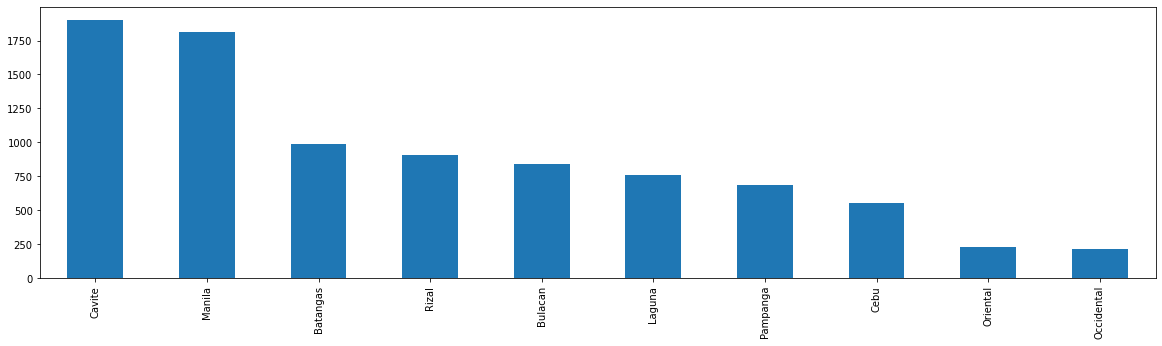

In [ ]:
# GET UNIQUE VALUES AND DISPLAY TOP 5 MOST OCCURING

plt.figure(figsize=(20,5))
df['City/Province'].value_counts()[:10].sort_values(ascending=False).plot.bar()

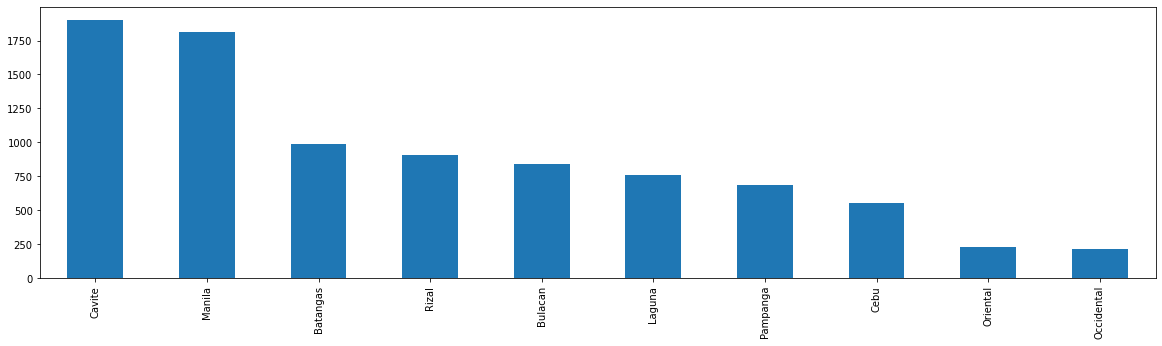

In [ ]:
plt.figure(figsize=(20,5))
df['City/Province'].value_counts()[:10].sort_values(ascending=False).plot.bar()


In [ ]:
df['Cost'].nlargest(5)

7843    600000000.0
3624    500000000.0
1815    436000000.0
1883    436000000.0
745     420000000.0
Name: Cost, dtype: float64

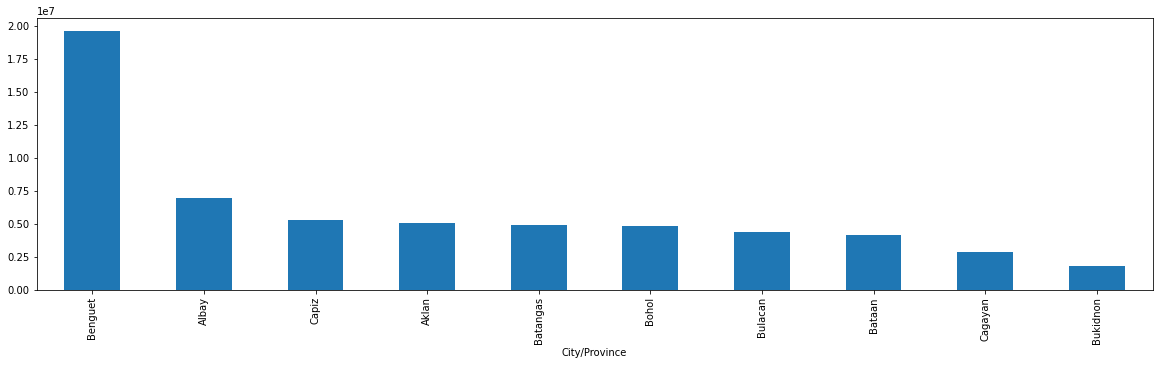

In [ ]:
plt.figure(figsize=(20,5))
df.groupby('City/Province')['Cost'].mean()[:10].sort_values(ascending=False).plot.bar()

In [ ]:
## Z Score defines how many standard deviation away a datapoint is from the mean. 

df['zscore'] = (df.Cost-df.Cost.mean())/df.Cost.std() # Adding a zcore column to our dataframe
df.sample(5)

,HouseDescription,Address,Cost,City/Province,zscore
8070,For Sale Townhouse 2 Bedrooms 1 Bathroom 45 sqm.,"Imus, Cavite",1690000.0,Cavite,-0.424493
6456,For Sale Single Detached House 4 Bedrooms 3 Ba...,"Iloilo City, Iloilo",11000000.0,Iloilo,0.045799
3149,For Sale Single Detached House 3 Bedrooms 2 Ba...,"Cebu City, Cebu",6220000.0,Cebu,-0.195661
7619,For Sale Single Detached House 5 Bedrooms 5 Ba...,"Taytay, Rizal",19000000.0,Rizal,0.449917
8083,For Sale Single Attached House 5 Bedrooms 3 Ba...,"Legazpi, Albay",18000000.0,Albay,0.399402


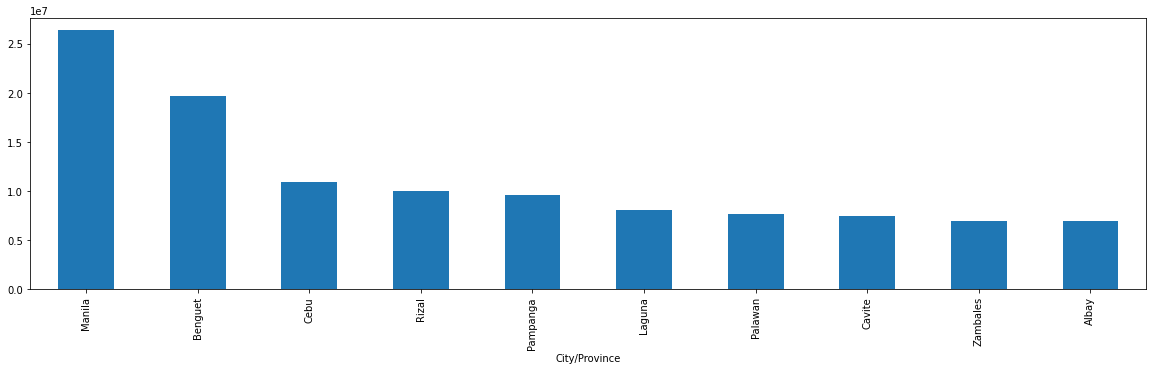

In [ ]:
# Top 10 expensive houses and their locations

plt.figure(figsize=(20,5))
df.groupby('City/Province')['Cost'].mean().nlargest(10).plot.bar()

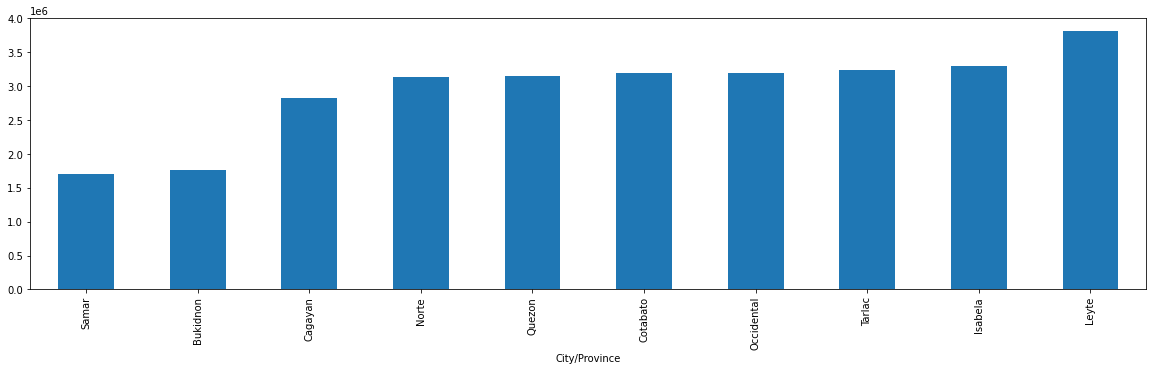

In [ ]:
# Top 10 cheapest houses and their locations

plt.figure(figsize=(20,5))
df.groupby('City/Province')['Cost'].mean().nsmallest(10).plot.bar()

In [ ]:
df.shape

(10795, 5)

In [ ]:
def findSQM(desc):
  s = 'sqm.'

  if s.lower() in desc.lower():
    descSplit = desc.split()
    ind = descSplit.index(s.lower())
    listResult = descSplit[ind-1]
    return listResult
  
  else:
    return 0

df['Sqm'] = df['HouseDescription'].apply(lambda text: findSQM(text))
df.sample(5)

,HouseDescription,Address,Cost,City/Province,zscore,Sqm
4208,For Sale Single Attached House 2 Bedrooms 1 Ba...,"Iriga, Camarines Sur",2060000.0,Sur,-0.405803,36
9691,For Sale Single Detached House 5 Bedrooms 2 Ba...,"Quezon City / QC, Metro Manila",22000000.0,Manila,0.601461,336
9703,For Sale Townhouse 3 Bedrooms 3 Bathrooms 161 ...,"Las Piñas, Metro Manila",18800000.0,Manila,0.439814,161
4384,For Sale Single Attached House 1 Bedroom 1 Bat...,"Tanauan, Batangas",1520000.0,Batangas,-0.433081,27
7735,For Sale Townhouse 3 Bedrooms 2 Bathrooms 41 s...,"Dumaguete, Negros Oriental",3170000.0,Oriental,-0.349731,41


In [ ]:
df['HouseDescription'] = df['HouseDescription'].str.replace('Bathrooms', 'Bathroom')
df.sample(10) 

,HouseDescription,Address,Cost,City/Province,zscore,Sqm
8993,For Sale Single Detached House 6 Bedrooms 5 Ba...,"Lipa, Batangas",45000000.0,Batangas,1.763301,192
915,For Sale Townhouse 2 Bedrooms 1 Bathroom 44 sqm.,"Rodriguez (Montalban), Rizal",1930000.0,Rizal,-0.412370,44
7644,For Sale Townhouse 2 Bedrooms 1 Bathroom 44 sqm.,"Dumaguete, Negros Oriental",1700000.0,Oriental,-0.423988,44
3595,For Sale Single Detached House 3 Bedrooms 3 Ba...,"San Fernando, Pampanga",5950000.0,Pampanga,-0.209300,76
5668,For Sale Single Detached House 4 Bedrooms 4 Ba...,"Consolacion, Cebu",47000000.0,Cebu,1.864330,475
3954,For Sale Single Attached House 3 Bedrooms 2 Ba...,"Santa Cruz, Laguna",2190000.0,Laguna,-0.399236,145
6824,For Sale Townhouse 5 Bedrooms 3 Bathroom 275 s...,"San Juan, Metro Manila",24800000.0,Manila,0.742903,275
9978,For Sale Townhouse 2 Bedrooms 1 Bathroom 36 sqm.,"General Santos (Dadiangas), South Cotabato",2340000.0,Cotabato,-0.391659,36
5253,For Sale Townhouse 3 Bedrooms 1 Bathroom 53 sqm.,"Concepcion, Tarlac",2100000.0,Tarlac,-0.403782,53
880,For Sale Townhouse 1 Bedroom 1 Bathroom 28 sqm.,"Tarlac City, Tarlac",638000.0,Tarlac,-0.477635,28


In [ ]:
def findBath(desc):
  b = 'Bathroom'

  if b.lower() in desc.lower():
    descSplit = desc.split()
    ind = descSplit.index(b)
    listResult = descSplit[ind-1]
    return listResult
  
  else:
    return 0

df['Bathrooms'] = df['HouseDescription'].apply(lambda text: findBath(text))
df.head()

,HouseDescription,Address,Cost,City/Province,zscore,Sqm,Bathrooms
0,For Sale Single Attached House 3 Bedrooms 2 Ba...,"Urdaneta, Pangasinan",5580000.0,Pangasinan,-0.227991,115,2
1,For Sale Single Detached House 3 Bedrooms 2 Ba...,"San Fernando, Pampanga",8300000.0,Pampanga,-0.090591,150,2
2,For Sale Single Detached House 3 Bedrooms 5 Ba...,"Cebu City, Cebu",14000000.0,Cebu,0.197343,238,5
3,For Sale Single Detached House 5 Bedrooms 8 Ba...,"Antipolo, Rizal",35000000.0,Rizal,1.258153,525,8
4,For Sale Single Detached House 7 Bedrooms 6 Ba...,"Tagaytay, Cavite",54000000.0,Cavite,2.217933,"1,200",6


In [ ]:
def findBedRooms(desc):
  b = 'Bedrooms'

  if b.lower() in desc.lower():
    descSplit = desc.split()
    ind = descSplit.index(b)
    listResult = descSplit[ind-1]
    return listResult
  
  else:
    return 0

df['Bedrooms'] = df['HouseDescription'].apply(lambda text: findBedRooms(text))
df.head()

,HouseDescription,Address,Cost,City/Province,zscore,Sqm,Bathrooms,Bedrooms
0,For Sale Single Attached House 3 Bedrooms 2 Ba...,"Urdaneta, Pangasinan",5580000.0,Pangasinan,-0.227991,115,2,3
1,For Sale Single Detached House 3 Bedrooms 2 Ba...,"San Fernando, Pampanga",8300000.0,Pampanga,-0.090591,150,2,3
2,For Sale Single Detached House 3 Bedrooms 5 Ba...,"Cebu City, Cebu",14000000.0,Cebu,0.197343,238,5,3
3,For Sale Single Detached House 5 Bedrooms 8 Ba...,"Antipolo, Rizal",35000000.0,Rizal,1.258153,525,8,5
4,For Sale Single Detached House 7 Bedrooms 6 Ba...,"Tagaytay, Cavite",54000000.0,Cavite,2.217933,"1,200",6,7


In [ ]:
df['Sqm'] = df['Sqm'].str.replace(',', '')
df['Sqm'] = df['Sqm'].replace(np.nan, 0)
df['Sqm'] = df['Sqm'].astype('int32')

df.sample(5)

,HouseDescription,Address,Cost,City/Province,zscore,Sqm,Bathrooms,Bedrooms
2286,For Sale Single Attached House 4 Bedrooms 3 Ba...,"Lingayen, Pangasinan",15000000.0,Pangasinan,0.247858,200,3,4
7312,For Sale Single Attached House 5 Bedrooms 4 Ba...,"Parañaque, Metro Manila",28000000.0,Manila,0.904550,275,4,5
3048,For Sale Townhouse 3 Bedrooms 1 Bathroom 66 sqm.,"Manila, Metro Manila",3800000.0,Manila,-0.317907,66,1,3
796,For Sale Townhouse 4 Bedrooms 3 Bathroom 130 s...,"Mandaluyong, Metro Manila",14500000.0,Manila,0.222601,130,3,4
7713,For Sale Single Attached House 2 Bedrooms 1 Ba...,"Dasmariñas, Cavite",1900000.0,Cavite,-0.413885,50,1,2


In [ ]:
df['Bathrooms'] = df['Bathrooms'].str.replace(',', '')
df['Bathrooms'] = df['Bathrooms'].replace(np.nan, 0)
df['Bathrooms'] = df['Bathrooms'].astype('int32')

df.sample(5)

,HouseDescription,Address,Cost,City/Province,zscore,Sqm,Bathrooms,Bedrooms
2493,For Sale Single Detached House 4 Bedrooms 3 Ba...,"General Trias, Cavite",23900000.0,Cavite,0.697439,215,3,4
6085,For Sale Townhouse 3 Bedrooms 3 Bathroom 280 s...,"Taguig, Metro Manila",30000000.0,Manila,1.005579,280,3,3
1933,For Sale Single Detached House 4 Bedrooms 3 Ba...,"Lipa, Batangas",9640000.0,Batangas,-0.022901,160,3,4
7332,For Sale Single Attached House 2 Bedrooms 1 Ba...,"Alaminos, Laguna",1980000.0,Laguna,-0.409844,36,1,2
6793,For Sale Single Attached House 2 Bedrooms 2 Ba...,"Iloilo City, Iloilo",2830000.0,Iloilo,-0.366906,45,2,2


In [ ]:
df['Bedrooms'] = df['Bedrooms'].str.replace(',', '')
df['Bedrooms'] = df['Bedrooms'].replace(np.nan, 0)
df['Bedrooms'] = df['Bedrooms'].astype('int32')

df.sample(5)

,HouseDescription,Address,Cost,City/Province,zscore,Sqm,Bathrooms,Bedrooms
7904,For Sale Townhouse 2 Bedrooms 1 Bathroom 36 sqm.,"Tagum, Davao del Norte",2230000.0,Norte,-0.397215,36,1,2
6690,For Sale Others 3 Bedrooms 2 Bathroom 72 sqm.,"Silang, Cavite",6370000.0,Cavite,-0.188084,72,2,3
660,For Sale Single Detached House 3 Bedrooms 2 Ba...,"Panglao, Bohol",4000000.0,Bohol,-0.307804,61,2,3
5009,For Sale Single Detached House 4 Bedrooms 3 Ba...,"Quezon City / QC, Metro Manila",45900000.0,Manila,1.808764,500,3,4
1822,For Sale Single Detached House 3 Bedrooms 2 Ba...,"San Fernando, Pampanga",2800000.0,Pampanga,-0.368422,72,2,3


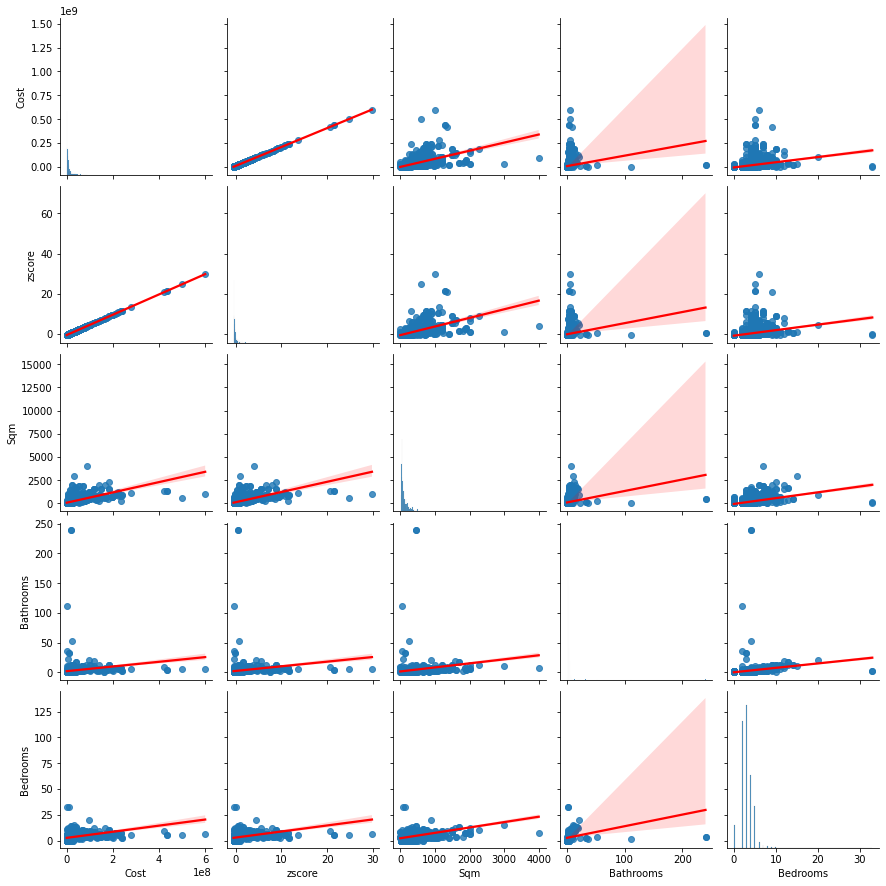

In [ ]:
sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [ ]:
new_df = df[['Address', 'Bedrooms', 'Bathrooms', 'Sqm', 'Cost']]
new_df.head()

,Address,Bedrooms,Bathrooms,Sqm,Cost
0,"Urdaneta, Pangasinan",3,2,115,5580000.0
1,"San Fernando, Pampanga",3,2,150,8300000.0
2,"Cebu City, Cebu",3,5,238,14000000.0
3,"Antipolo, Rizal",5,8,525,35000000.0
4,"Tagaytay, Cavite",7,6,1200,54000000.0


In [ ]:
new_df.shape

(10795, 5)

In [ ]:
new_df.to_csv('CleanHousesData.csv')